#### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
df = pd.read_csv('students_performance_edit.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall,math_pass,reading_pass,writing_pass,status
0,female,group B,bachelor's degree,standard,none,72,72,74,73,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,82,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,93,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,Fail,Pass,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,76,Pass,Pass,Pass,Pass


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
overall                         int64
math_pass                      object
reading_pass                   object
writing_pass                   object
status                         object
dtype: object

#### Label Encoding

In [4]:
data = df.copy()

In [5]:
# creating an encoder
le = LabelEncoder()

# label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for race / ethnicity
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for math pass
data['math_pass'] = le.fit_transform(data['math_pass'])

# label encoding for reading pass
data['reading_pass'] = le.fit_transform(data['reading_pass'])

# label encoding for writing pass
data['writing_pass'] = le.fit_transform(data['writing_pass'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

In [6]:
# Checking the dataframe
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall,math_pass,reading_pass,writing_pass,status
0,0,2,1,1,1,72,72,74,73,1,1,1,1
1,0,3,4,1,0,69,90,88,82,1,1,1,1
2,0,2,3,1,1,90,95,93,93,1,1,1,1
3,1,1,0,0,1,47,57,44,49,0,1,0,0
4,1,3,4,1,1,76,78,75,76,1,1,1,1


In [7]:
data.dtypes

gender                         int32
race/ethnicity                 int64
parental level of education    int32
lunch                          int32
test preparation course        int32
math score                     int64
reading score                  int64
writing score                  int64
overall                        int64
math_pass                      int32
reading_pass                   int32
writing_pass                   int32
status                         int32
dtype: object

#### Data Preparation

In [8]:
# Splitting the dependent and independent variables
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
print('The shape of the independent variable x is: ', x.shape)
print('The shape of the dependent variable y is: ', y.shape)

The shape of the independent variable x is:  (1000, 12)
The shape of the dependent variable y is:  (1000,)


In [10]:
# Splitting the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 0, test_size = .25)

print('xtrain: ', xtrain.shape)
print('xtest: ', xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

xtrain:  (750, 12)
xtest:  (250, 12)
ytrain:  (750,)
ytest:  (250,)


In [11]:
# Creating a scaler
mm = MinMaxScaler()

xtrain = mm.fit_transform(xtrain)
xtest = mm.transform(xtest)

#### Modeling
##### Logistic Regression

In [12]:
# Create a model
lr = LogisticRegression(random_state=0, )

# Feeding the training data to the model
lr.fit(xtrain, ytrain)

# Prediction
ypred = lr.predict(xtest)

# calculating the classification accuracies
print("Training Accuracy :", lr.score(xtrain, ytrain))
print("Testing Accuracy :", lr.score(xtest, ytest))
aslog = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', aslog)
print('Confusion Matrix: ')
confusion_matrix(ytest, ypred)

Training Accuracy : 0.98
Testing Accuracy : 0.98
Accuracy of the model:  0.98
Confusion Matrix: 


array([[ 20,   2],
       [  3, 225]], dtype=int64)

##### Random Forest

In [13]:
# Creating a model
rf = RandomForestClassifier(n_estimators=10, random_state=0, criterion='entropy')

# Feeding the training data to the model
rf.fit(xtrain, ytrain)

# Prediction
ypred = rf.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", rf.score(xtrain, ytrain))
print("Testing Accuracy :", rf.score(xtest, ytest))
print('Accuracy of the model: ', accuracy_score(ytest, ypred))
print('Confusion Matrix: ')
confusion_matrix(ytest, ypred)

Training Accuracy : 1.0
Testing Accuracy : 0.996
Accuracy of the model:  0.996
Confusion Matrix: 


array([[ 22,   0],
       [  1, 227]], dtype=int64)

Training Accuracy : 1.0
Testing Accuracy : 1.0
Accuracy of the model:  1.0
Confusion Matrix: 
[[ 22   0]
 [  0 228]] 



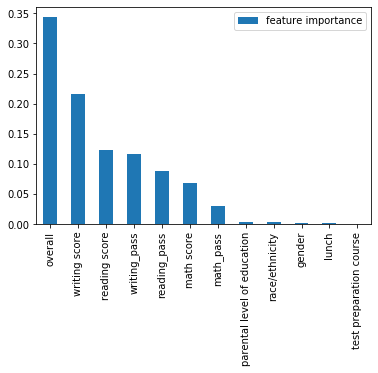

In [56]:
# Creating a model
rf = RandomForestClassifier(n_estimators=100, random_state=0, criterion='entropy')

# Feeding the training data to the model
rf.fit(xtrain, ytrain)

# Prediction
ypred = rf.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", rf.score(xtrain, ytrain))
print("Testing Accuracy :", rf.score(xtest, ytest))
asrf = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asrf)
print('Confusion Matrix: ')
cm = confusion_matrix(ytest, ypred)
print(cm,'\n')

# Feature Importance
importance = pd.DataFrame(rf.feature_importances_, index=df.columns[:-1], columns=['feature importance']).sort_values('feature importance', ascending=False)
importance

# Plot of feature importance
importance.plot(kind = 'bar')
plt.show()

Random Forest algorithm performs very well and reach the highest accuracy. The bar plot above shows us that the scores on each subject and especially the overall score play a crucial role on the prediction of the model. On the other hand the rest columns do not play any role on the accuracy of the model. 

##### K-Nearest Neighbor(KNN)

In [15]:
# Creating a model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Feeding the training data to the model
knn.fit(xtrain, ytrain)

# Prediction
ypred = knn.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", knn.score(xtrain, ytrain))
print("Testing Accuracy :", knn.score(xtest, ytest))

Training Accuracy : 0.98
Testing Accuracy : 0.98


In [16]:
# Evaluate different k values 
k_val = [1,2,3,4,5,6,7,8,9,10,15,20]

for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print('Prediction performance of KNN with K of {} is {}'.format(i, accuracy))

Prediction performance of KNN with K of 1 is 0.976
Prediction performance of KNN with K of 2 is 0.98
Prediction performance of KNN with K of 3 is 0.98
Prediction performance of KNN with K of 4 is 0.98
Prediction performance of KNN with K of 5 is 0.98
Prediction performance of KNN with K of 6 is 0.98
Prediction performance of KNN with K of 7 is 0.976
Prediction performance of KNN with K of 8 is 0.976
Prediction performance of KNN with K of 9 is 0.976
Prediction performance of KNN with K of 10 is 0.98
Prediction performance of KNN with K of 15 is 0.98
Prediction performance of KNN with K of 20 is 0.972


In [17]:
# Compute the sqrt
math.sqrt(len(ytest))

15.811388300841896

In [18]:
# Creating a model
knn = KNeighborsClassifier(n_neighbors=16, metric='euclidean')

# Feeding the training data to the model
knn.fit(xtrain, ytrain)

# Prediction
ypred = knn.predict(xtest)

# calculating the accuracies of training and testing datasets
print("Training Accuracy :", knn.score(xtrain, ytrain))
print("Testing Accuracy :", knn.score(xtest, ytest))

# Calculate the accuracy of the model
asknn = accuracy_score(ytest, ypred)
print('Accuracy of the model:{}'.format(asknn))

Training Accuracy : 0.9786666666666667
Testing Accuracy : 0.98
Accuracy of the model:0.98


##### Decision Tree

In [47]:
# Creating the model
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)

# Feeding the training data to the model
dt.fit(xtrain, ytrain)

# prediction
ypred = dt.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", dt.score(xtrain, ytrain))
print("Testing Accuracy :", dt.score(xtest, ytest))
asdt = accuracy_score(ytest, ypred)
print('Accurac of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 1.0
Accurac of the model:  1.0


In [20]:
# Decision Tree - Different depth
depth = [1,2,3,4,5,6,7,8,9,10,15,20]

for i in depth:
    dt = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=i)
    dt.fit(xtrain, ytrain)
    ypred = dt.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print('Accuracy with depth of {} is {}'.format(i, accuracy))

Accuracy with depth of 1 is 1.0
Accuracy with depth of 2 is 1.0
Accuracy with depth of 3 is 1.0
Accuracy with depth of 4 is 1.0
Accuracy with depth of 5 is 1.0
Accuracy with depth of 6 is 1.0
Accuracy with depth of 7 is 1.0
Accuracy with depth of 8 is 1.0
Accuracy with depth of 9 is 1.0
Accuracy with depth of 10 is 1.0
Accuracy with depth of 15 is 1.0
Accuracy with depth of 20 is 1.0


##### Support Vector Machine

In [21]:
# Creating the model
support = SVC(kernel='poly')

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 0.9813333333333333
Testing Accuracy : 0.972
Accuracy of the model:  1.0


In [22]:
# Creating the model
support = SVC(kernel='rbf')

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 0.9826666666666667
Testing Accuracy : 0.98
Accuracy of the model:  1.0


In [23]:
# Creating the model
support = SVC(kernel='linear', C = 10)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 0.9826666666666667
Testing Accuracy : 0.98
Accuracy of the model:  1.0


In [24]:
# Creating the model
support = SVC(kernel='linear',C = 100, gamma=1)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 0.9986666666666667
Testing Accuracy : 0.992
Accuracy of the model:  1.0


In [25]:
# Creating the model
support = SVC(kernel='linear',C = 1000, gamma=1)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 0.992
Accuracy of the model:  1.0


In [26]:
# Creating the model
support = SVC(kernel='linear',C = 1000, gamma=1)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 0.992
Accuracy of the model:  1.0


In [27]:
# Creating the model
support = SVC(kernel='linear',C = 1000, gamma=.1)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 0.992
Accuracy of the model:  1.0


In [28]:
# Creating the model
support = SVC(kernel='linear',C = 1000, gamma=.01)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 0.992
Accuracy of the model:  1.0


In [29]:
# Creating the model
support = SVC(kernel='linear',C = 1000, gamma=.001)

# Feeding the training data to the model
support.fit(xtrain, ytrain)

# prediction
support.predict(xtest)

# calculating the accuracies
print("Training Accuracy :", support.score(xtrain, ytrain))
print("Testing Accuracy :", support.score(xtest, ytest))
assup = accuracy_score(ytest, ypred)
print('Accuracy of the model: ', asdt)

Training Accuracy : 1.0
Testing Accuracy : 0.992
Accuracy of the model:  1.0


We notice that as we increase the regularization (C), the accuracy of training and testing sets, increases simultaneously, but remains the same beyond C =1000. Keeping the same kernel and regularization, we change the value of gamma in oreder to check the accuracy of the model. The accuracy of training, testing and accuracy of the model remains the same.  

In [30]:
# Print the accuracy score for each model
print('Logistic Regression')
print('The accuracy score of the model is: {}%'.format(aslog*100))

print('\nDesicion Tree')
print('The accuracy score of the model is: {}%'.format(asdt*100))

print('\nRandom Forest')
print('The accuracy score of the model is: {}%'.format(asrf*100))

print('\nKNN')
print('The accuracy score of the model is: {}%'.format(asknn*100))

print('\nSupport Vector Machine')
print('The accuracy score of the model is: {}%'.format(assup*100))

Logistic Regression
The accuracy score of the model is: 98.0%

Desicion Tree
The accuracy score of the model is: 100.0%

Random Forest
The accuracy score of the model is: 100.0%

KNN
The accuracy score of the model is: 98.0%

Support Vector Machine
The accuracy score of the model is: 100.0%
